In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

from shapely.geometry import Point, Polygon

from datetime import timedelta


In [24]:
map = gpd.read_file('geo-data/limite250_l_.shp')
#fig, ax = plt.subplots(figsize=(15,15))
#map.plot(ax=ax)

In [50]:
data = pd.read_csv('data/2023.csv')
data.columns

Index(['Fecha', 'Latitud', 'Longitud', 'Ubicacion', 'Municipio', 'Comunidad',
       'Productor', 'Cultivo', 'Variedad', 'Etapa_Fenologica',
       'Actividad_Realizada', 'Especie_Detectada', 'No_Inscripcion',
       'Superficie_Ha', 'Resultado', 'Sitios_Muestreados',
       'Individuos_Encontrados', 'Estado_Biologico', 'Infestacion',
       'Unidad_Medida', 'Etapa_Fasica', 'Coloracion', 'Tipo_Formacion',
       'Recomendaciones', 'Estado', 'JLSV', 'Ano', 'Mes', 'Semana', 'Tecnico',
       'Mes_IF', 'CampanaID', 'EjercicioID', 'EstadoID', 'JuntaID',
       'TecnicoID', 'SiembraID', 'ProductorID', 'AnoMapa', 'Version',
       'SitioID', 'ActividadID', 'ID', 'AddRecord', 'ChangeRecord',
       'SMARTPHONE', 'Anual'],
      dtype='object')

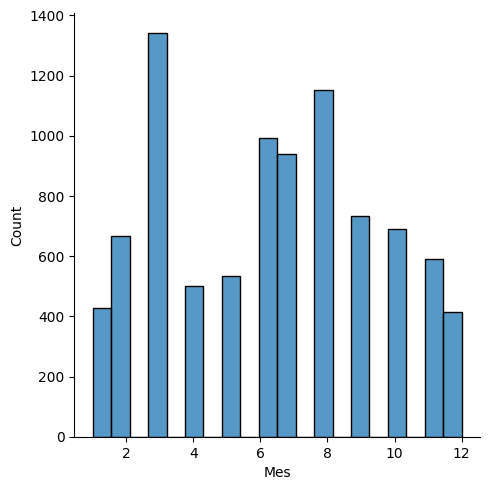

In [51]:
sns.displot(data, x="Mes")


In [52]:
data = data[data['Actividad_Realizada'] == 'Exploración']
data['Resultado'].value_counts()

Resultado
Negativo      6631
Positivo      1168
En proceso      16
Name: count, dtype: int64

In [64]:
data_mes = data.query('Mes == 12')
data_mes.to_csv('data/2023-diciembre.csv')

: 

In [ ]:
data_output = data[['Fecha','Latitud','Longitud','Resultado']]
data_output['Fecha'] = data_output['Fecha'].astype('datetime64[s]')
data_output['Fecha_inicio'] = data_output['Fecha'] - timedelta(days=96)
data_output

In [9]:
data_filtered = pd.DataFrame(np.unique(data_output[['Latitud', 'Longitud']], axis=0), columns=['Latitud','Longitud'])
data_filtered.to_csv('unique_points.csv',index=False)

In [31]:
#data_output.groupby(data_output["Fecha"].dt.month)['Fecha'].count().plot(kind="bar", xlabel="Mes")
data_output['Positivo'] = np.where(data_output['Resultado']=='Positivo',1,0)
data_output['Negativo'] = np.where(data_output['Resultado']=='Negativo',1,0)

data_output.groupby(data_output["Fecha"].dt.month).agg({'Positivo':'sum','Negativo':'sum'}).plot(kind="bar", xlabel="Mes")


NameError: name 'data_output' is not defined

In [ ]:
ax = sns.countplot(x="Resultado",data=data,palette = "Set2")


In [32]:
data_map = data[["Latitud", "Longitud","Resultado"]]
data_map
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(data_map['Longitud'], data_map['Latitud'])]
geo_df = gpd.GeoDataFrame(data_map, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) 


c:\Users\seder\code\locust\.venv\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


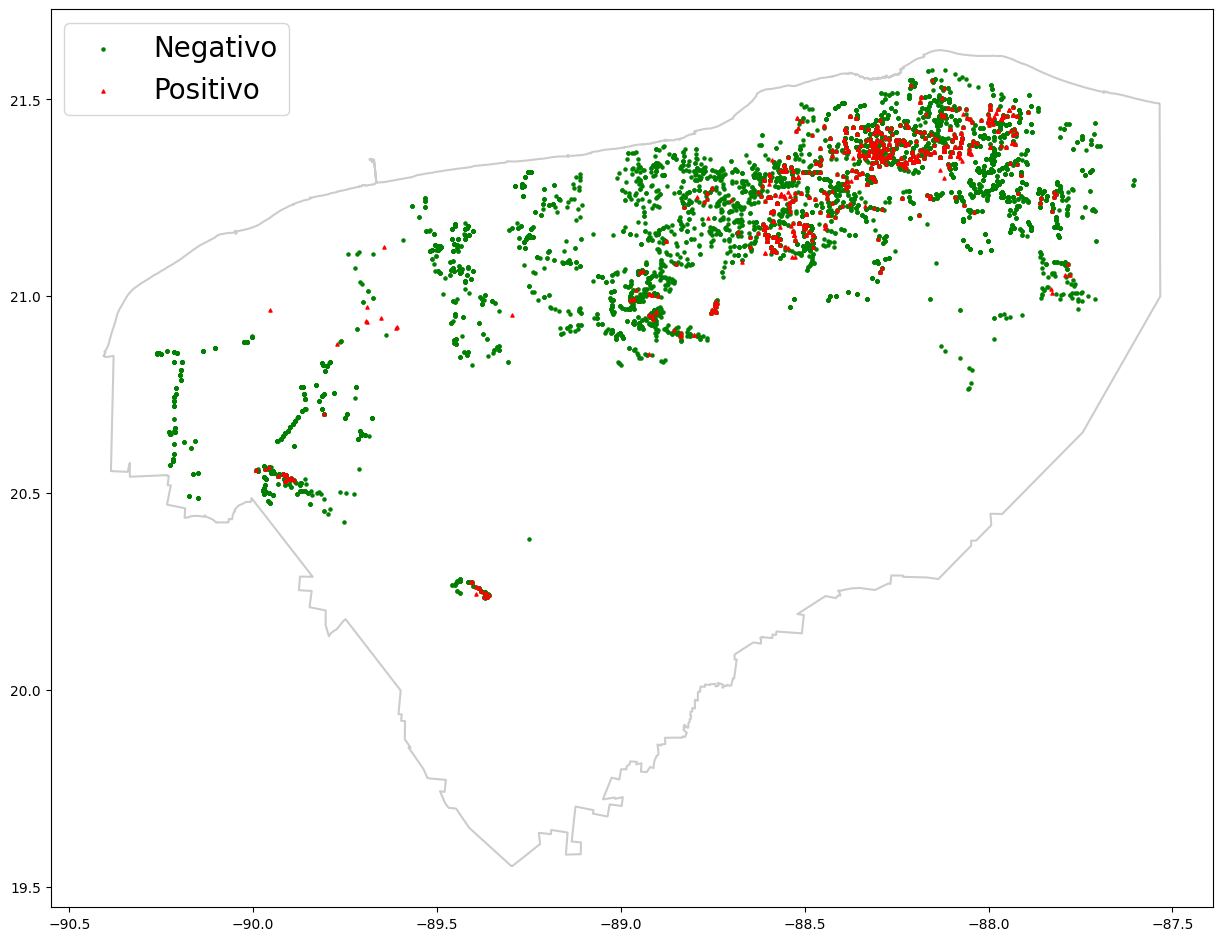

In [33]:
fig, ax = plt.subplots(figsize=(15,15))
map.plot(ax=ax, alpha=0.4, color='grey')
geo_df[geo_df['Resultado'] == 'Negativo'].plot(ax=ax, 
                                       markersize=5, 
                                       color='green', 
                                       marker='o', 
                                       label='Negativo')

geo_df[geo_df['Resultado'] == 'Positivo'].plot(ax=ax, 
                                       markersize=5, 
                                       color='red', 
                                       marker='^', 
                                       label='Positivo')

plt.legend(prop={'size':20})
